In [1]:
import pandas as pd
from getters.get_data import GetData
import csv

Instanciando objeto e realizando o download dos dados

In [2]:
get = GetData('https://www.ipea.gov.br/atlasestado/arquivos/downloads/5233-liquidosexoraca.csv')
get.get_data()

In [7]:
# Importando os dados para um dataframe
df = pd.read_csv('data/serie_historica.csv', sep=';')

Realizando tratamento dos dados obtidos

In [11]:
df.head()

,Unnamed: 0,ano,sexo_raça,liquido
0,1,1999,Homem Branco,"6527,2"
1,2,1999,Homem Negro,"4768,7"
2,3,1999,Mulher Branca,"5261,6"
3,4,1999,Mulher Negra,4010
4,5,2000,Homem Branco,"5690,3"


In [14]:
# Segmentando sexo e raça
# Importante notar que apesar de segmentar a raça, a coluna ainda define o sexo pelo pronome
df['sexo'] = df['sexo_raça'].apply(lambda x: x.split(' ')[0])
df['raca'] = df['sexo_raça'].apply(lambda x: x.split(' ')[1])

In [83]:
# Para realmente desagregar a raça do sexo, é necessário normalizar as categorias para branco x negro
def agrega_raca(valor):

    if 'Branc' in valor:
        return 'Brancx'
        
    return 'Negrx'

In [84]:
df['raca_binaria'] = df['raca'].apply(lambda x: agrega_raca(x))

In [19]:
# Transformando valor liquido em float
df['liquido'] = df['liquido'].apply(lambda x: float(x.replace(',', '.')))

In [17]:
# Limpando colunas não utilizadas
df.drop(columns=['sexo_raça','Unnamed: 0'], inplace=True)

In [85]:
df.head()

,ano,liquido,sexo,raca,raca_binaria
0,1999,6527.2,Homem,Branco,Brancx
1,1999,4768.7,Homem,Negro,Negrx
2,1999,5261.6,Mulher,Branca,Brancx
3,1999,4010.0,Mulher,Negra,Negrx
4,2000,5690.3,Homem,Branco,Brancx


## Análise Exploratória dos dados

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylabel'

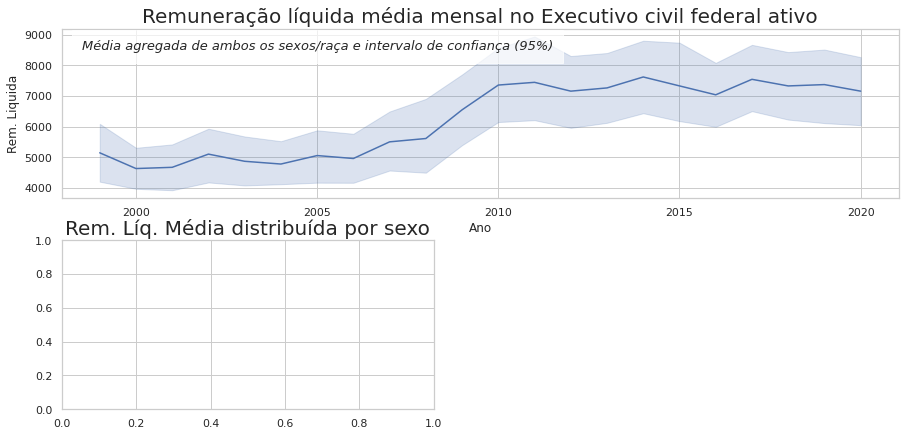

In [129]:
fig = plt.figure(figsize=(15,7))

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

# Create third axes, a combination of third and fourth cell
sub3 = fig.add_subplot(2,2,(1,2)) # two rows, two colums, combined third and fourth cell
sns.lineplot(x="ano", y="liquido", data=df)
plt.ylabel('Rem. Liquida')
plt.xlabel('Ano')
plt.title("Remuneração líquida média mensal no Executivo civil federal ativo", fontsize=20)
plt.text(1998.5,8500,'Média agregada de ambos os sexos/raça e intervalo de confiança (95%)',style='italic',
bbox={'facecolor': 'w', 'alpha': 0.7, 'pad': 10}, fontsize=13)


sub1 = fig.add_subplot(2,2,3) # two rows, two columns, fist cell
palette = sns.color_palette("mako_r", 2)
sns.lineplot(data=df, x="ano", y="liquido", hue="sexo", ax=ax[0], palette=palette)
plt.title("Rem. Líq. Média distribuída por sexo", fontsize=20)
plt.set_ylabel('Rem. Líq.')
plt.set_xlabel('Ano')

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,2,4) # two rows, two columns, second cell
plt.annotate('sub2', xy = (0.5, -0.5), va = 'center', ha = 'center',  weight='bold', fontsize = 15)
sub2.plot(x, y)


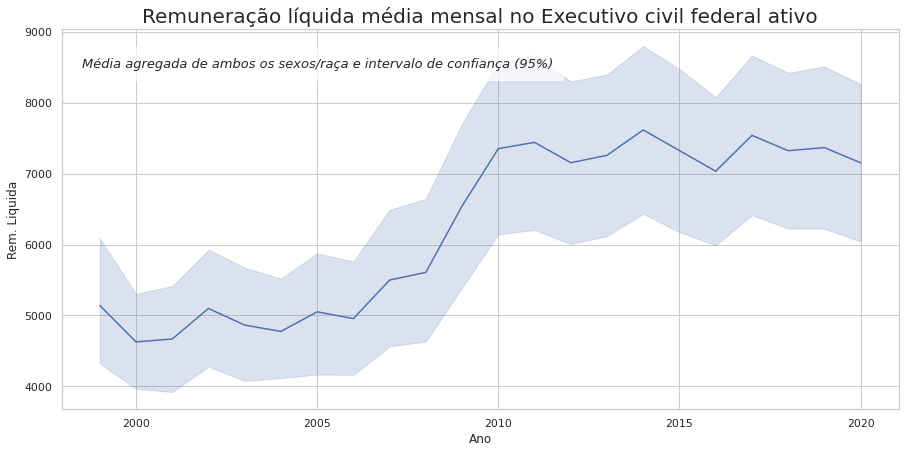

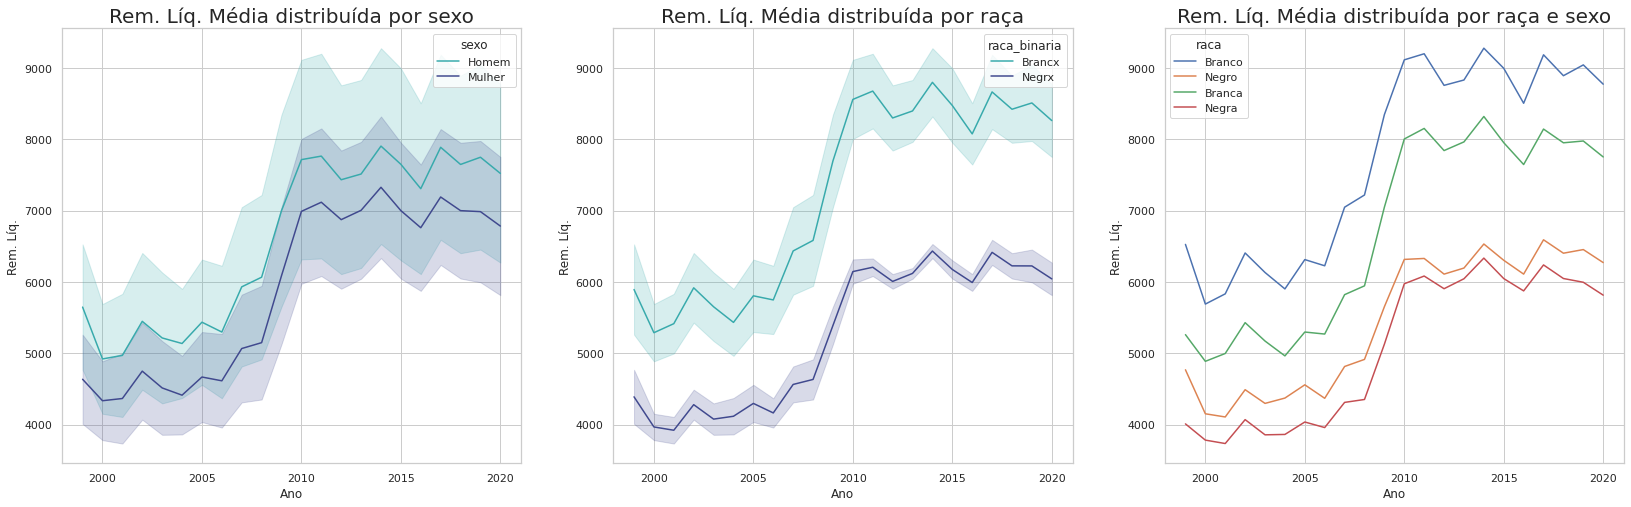

In [117]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
#plotting a series of liquido ano-mes-valor
sns.lineplot(x="ano", y="liquido", data=df)
plt.ylabel('Rem. Liquida')
plt.xlabel('Ano')
plt.title("Remuneração líquida média mensal no Executivo civil federal ativo", fontsize=20)
plt.text(1998.5,8500,'Média agregada de ambos os sexos/raça e intervalo de confiança (95%)',style='italic',
bbox={'facecolor': 'w', 'alpha': 0.7, 'pad': 10}, fontsize=13)
plt.show(1)


fig, ax = plt.subplots(1, 3, figsize=(28,8))
palette = sns.color_palette("mako_r", 2)
sns.lineplot(data=df, x="ano", y="liquido", hue="sexo", ax=ax[0], palette=palette)
ax[0].set_title("Rem. Líq. Média distribuída por sexo", fontsize=20)
ax[0].set_ylabel('Rem. Líq.')
ax[0].set_xlabel('Ano')

sns.lineplot(data=df, x="ano", y="liquido", hue="raca_binaria", ax=ax[1], palette=palette)
ax[1].set_title("Rem. Líq. Média distribuída por raça", fontsize=20)
ax[1].set_ylabel('Rem. Líq.')
ax[1].set_xlabel('Ano')


sns.lineplot(data=df, x="ano", y="liquido", hue="raca", ax=ax[2])
ax[2].set_title("Rem. Líq. Média distribuída por raça e sexo", fontsize=20)
ax[2].set_ylabel('Rem. Líq.')
ax[2].set_xlabel('Ano')

plt.show()

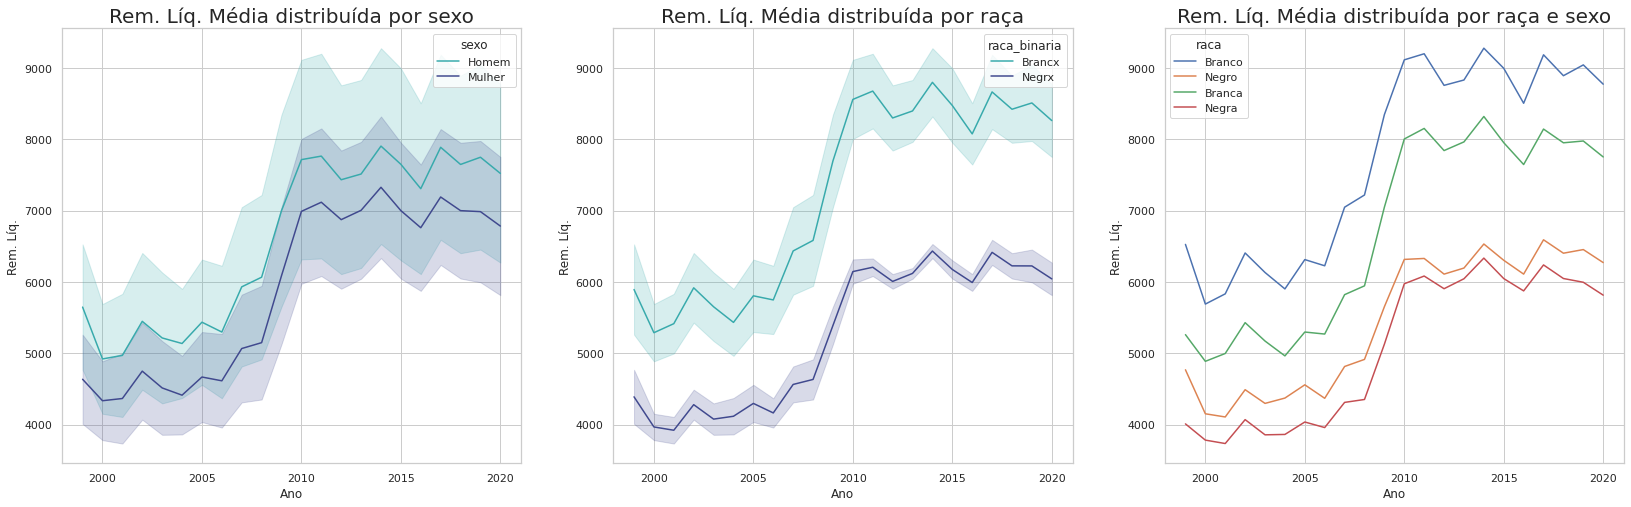

In [89]:
fig, ax = plt.subplots(1, 3, figsize=(28,8))
palette = sns.color_palette("mako_r", 2)
sns.lineplot(data=df, x="ano", y="liquido", hue="sexo", ax=ax[0], palette=palette)
ax[0].set_title("Rem. Líq. Média distribuída por sexo", fontsize=20)
ax[0].set_ylabel('Rem. Líq.')
ax[0].set_xlabel('Ano')

sns.lineplot(data=df, x="ano", y="liquido", hue="raca_binaria", ax=ax[1], palette=palette)
ax[1].set_title("Rem. Líq. Média distribuída por raça", fontsize=20)
ax[1].set_ylabel('Rem. Líq.')
ax[1].set_xlabel('Ano')


sns.lineplot(data=df, x="ano", y="liquido", hue="raca", ax=ax[2])
ax[2].set_title("Rem. Líq. Média distribuída por raça e sexo", fontsize=20)
ax[2].set_ylabel('Rem. Líq.')
ax[2].set_xlabel('Ano')

plt.show()

In [113]:
df[['liquido']].describe()

,liquido
count,88.000000
mean,6245.989773
std,1581.514317
min,3734.500000
25%,4989.050000
50%,6097.050000
75%,7674.000000
max,9279.100000


In [110]:
df.groupby(['ano','raca_binaria'], as_index=False)[['liquido']].median()

,ano,raca_binaria,liquido
0,1999,Brancx,5894.40
1,1999,Negrx,4389.35
2,2000,Brancx,5288.80
3,2000,Negrx,3967.10
4,2001,Brancx,5415.65
5,2001,Negrx,3920.85
6,2002,Brancx,5918.35
7,2002,Negrx,4279.65
8,2003,Brancx,5652.60
9,2003,Negrx,4077.05
